# Section 15  Unsupervised Learning: Clustering

In addition to **dimension reduction**, another typical task of unsupervised machine learning is **clustering**: assigning the data samples into several groups (called clusters) based on their similarity -- similar samples should be in the same cluster, and dissimilar samples should be in different clusters.

**Caution**: Don't confuse clustering (unsupervised) with classification (supervised)!

## [K-Means Clustering](https://en.wikipedia.org/wiki/K-means_clustering)

**Mathematical Description:** Given a set of observations $(x^{(1)}, x^{(2)}, ..., x^{(n)})$, where each observation is a p-dimensional real vector, k-means clustering aims to partition the $n$ samples into $K (\leq n)$ sets $S = {S_1, S_2, ..., S_K}$ so as to minimize the within-cluster sum of squares (i.e. variance). Formally, the objective is to find the best parition of groups such that minimize the "loss function" of $S$

$$\min_{S}\sum_{i=1}^{K}\sum_{x\in S_{i}}\|x-\mu_{i}\|^{2}$$

where $\mu_{i}$ is the mean of points in $S_i$.


**How to solve it:** The exact solution to the K-means problem is [NP hard](https://en.wikipedia.org/wiki/P_versus_NP_problem). In practical, the common approach is to apply [Lloyd's algorithm](https://en.wikipedia.org/wiki/Lloyd%27s_algorithm) to find the heuristic solutions (local minimum).

In the iterative algorithm, each iteration contains two steps:
- (**assignment step**) Given the cluster center, update the cluster of data according to its nearest cluster center.
- (**update step**) Given the cluster assignment, update the cluster centers by calculating the means within each cluster.

The algorithm may converge if no further adjustments can be made.

Because the algorithm may stuck in local minimums, the practical strategy is to randomly initialize the algorithm, and run multiple parallel programs to find the best partition with smallest "loss function ".

**Caution**: Don't confuse K-means clustering with kNN classification!

Below we will apply the functions in [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Note that to visualize the results of k-means on high-dimensional data, it is often combined with dimension reductions. Another pratical strategy is to use dimension reduction to pre-process the data, and apply clustering on the reduced datasets.

It is also worth noting that in practice, [determining true number of clusters ($K$) is a very hard problem](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set).

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

#This cell is completely optional and is provided for context

iris = load_iris(as_frame=True)
df_iris = pd.DataFrame(iris.data,columns=iris.feature_names)
df_iris['target'] = pd.Series(iris.target)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
#from sklearn.datasets import load_iris
X,y = load_iris(return_X_y = True)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
y_km = kmeans.fit_predict(X)

In [3]:
y_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

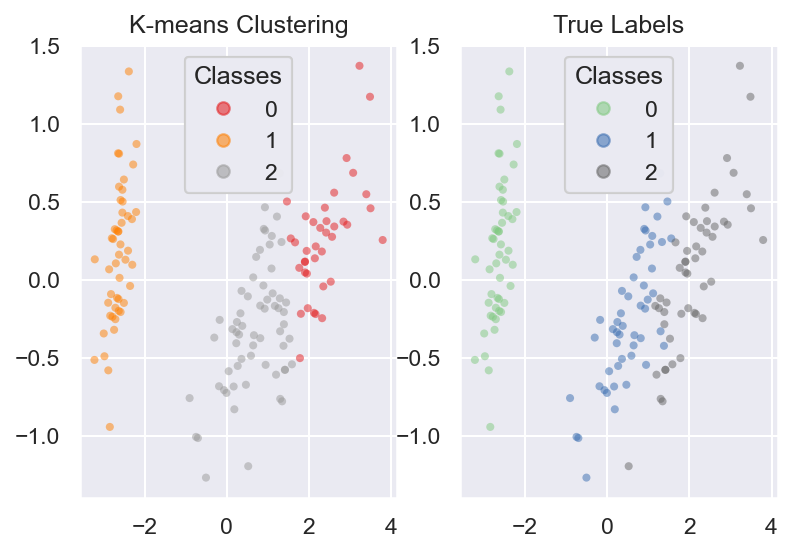

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
fig, (ax1, ax2) = plt.subplots(1, 2,dpi=150)

fig1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1],c=y_km, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Set1', 3))
fig2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1],c=y, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Accent', 3))
ax1.set_title('K-means Clustering')
legend1 = ax1.legend(*fig1.legend_elements(), loc="best", title="Classes")
ax1.add_artist(legend1)
ax2.set_title('True Labels')
legend2 = ax2.legend(*fig2.legend_elements(), loc="best", title="Classes")
ax2.add_artist(legend2)

To quantitatively measure the performace, it is not a good idea to naively compute "accuracy" as in the classification case, because permutation of the label values does not affect clustering results, while severely affects the "accuracy". There are many [good measures](https://scikit-learn.org/stable/modules/clustering.html) considering such effects in the clustering.

In [6]:
from sklearn import metrics
metrics.adjusted_rand_score(y_km, y)

0.7302382722834697

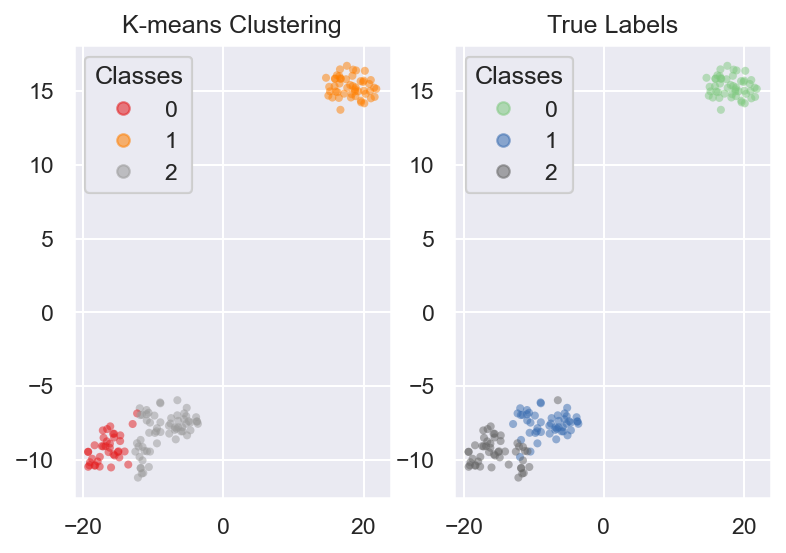

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=0, n_jobs = -1) #t-distributed stochastic neighbor embedding
X_tsne = tsne.fit_transform(X)


fig, (ax1, ax2) = plt.subplots(1, 2,dpi=150)

fig1 = ax1.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y_km, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Set1', 3))
fig2 = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Accent', 3))

ax1.set_title('K-means Clustering') 
#Colors from y_km, our fit at the top of this notebook

legend1 = ax1.legend(*fig1.legend_elements(), loc="best", title="Classes")
ax1.add_artist(legend1)
ax2.set_title('True Labels')
legend2 = ax2.legend(*fig2.legend_elements(), loc="best", title="Classes")
ax2.add_artist(legend2)


How about clustering on TSNE results?

In [8]:
y_km_tsne = kmeans.fit_predict(X_tsne)
metrics.adjusted_rand_score(y_km_tsne, y)

0.7726314170414115

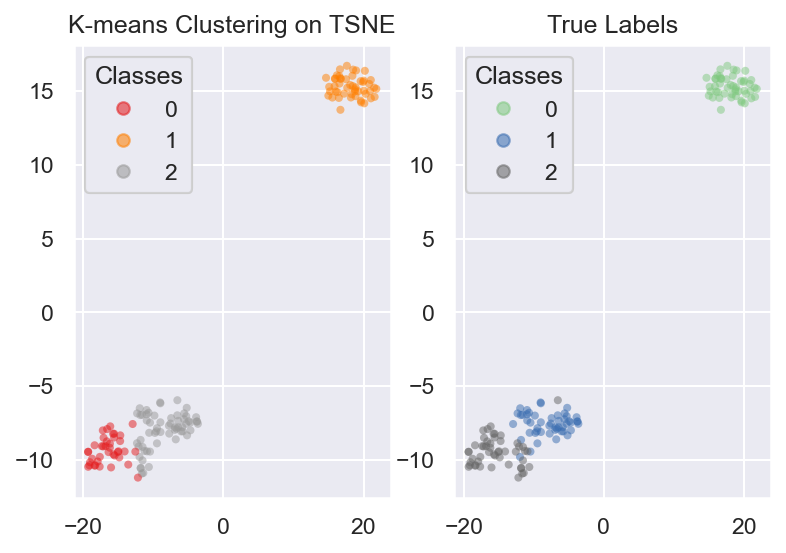

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2,dpi=150)

fig1 = ax1.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y_km_tsne, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Set1', 3))
fig2 = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Accent', 3))

ax1.set_title('K-means Clustering on TSNE')
#colors from y_km_tsne in the cell above this one. Compare the colorings of the diagram below vs. the diagram above.

legend1 = ax1.legend(*fig1.legend_elements(), loc="best", title="Classes")
ax1.add_artist(legend1)
ax2.set_title('True Labels')
legend2 = ax2.legend(*fig2.legend_elements(), loc="best", title="Classes")
ax2.add_artist(legend2)

Can we try other clustering methods?

In [10]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components = 3,random_state=0)
y_gm = gm.fit_predict(X)

More information on [Gaussian Mixture models](https://scikit-learn.org/stable/modules/mixture.html)

In [11]:
metrics.adjusted_rand_score(y_gm, y)

0.9038742317748124

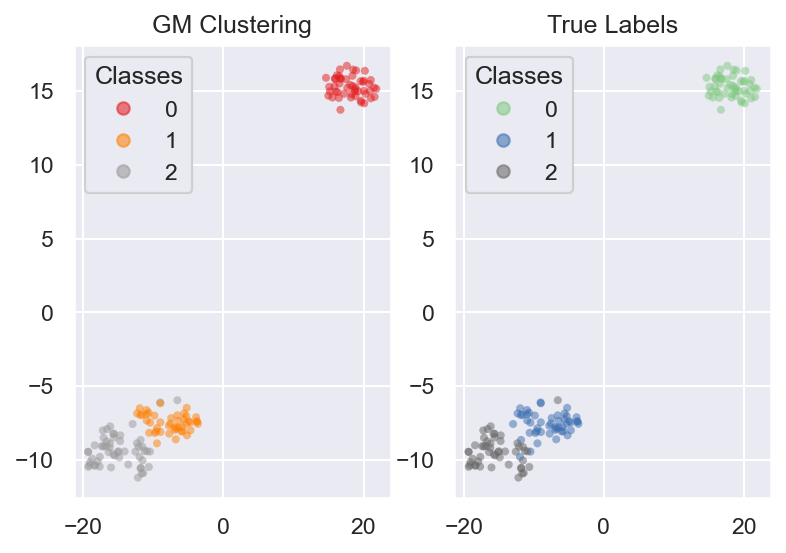

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2,dpi=150)

fig1 = ax1.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y_gm, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Set1', 3))
fig2 = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Accent', 3))
ax1.set_title('GM Clustering')
legend1 = ax1.legend(*fig1.legend_elements(), loc="best", title="Classes")
ax1.add_artist(legend1)
ax2.set_title('True Labels')
legend2 = ax2.legend(*fig2.legend_elements(), loc="best", title="Classes")
ax2.add_artist(legend2)

In [13]:
y_gm_tsne = gm.fit_predict(X_tsne)
metrics.adjusted_rand_score(y_gm_tsne, y) #Applying tsne to every model doesn't always help.

0.7195837484778037

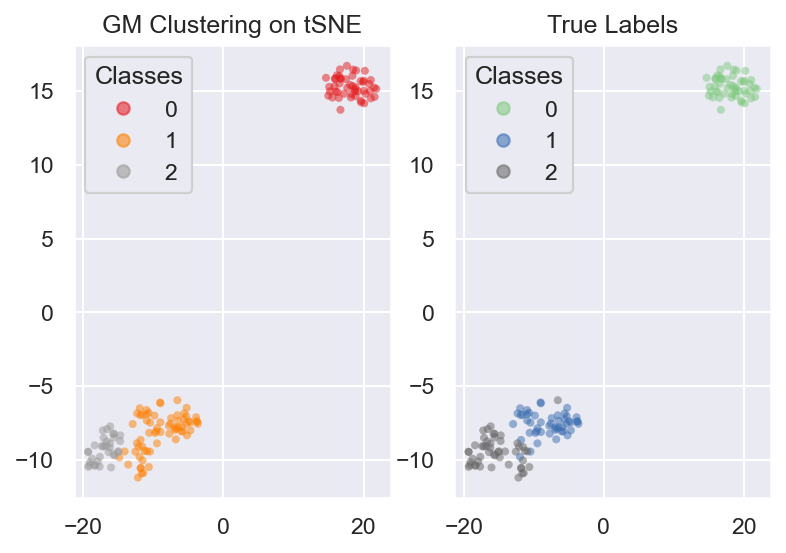

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2,dpi=150)

fig1 = ax1.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y_gm_tsne, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Set1', 3))
fig2 = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Accent', 3))
ax1.set_title('GM Clustering on tSNE')
legend1 = ax1.legend(*fig1.legend_elements(), loc="best", title="Classes")
ax1.add_artist(legend1)
ax2.set_title('True Labels')
legend2 = ax2.legend(*fig2.legend_elements(), loc="best", title="Classes")
ax2.add_artist(legend2)

Explore yourself and you may upload your results to [Kaggle](https://www.kaggle.com/uciml/iris)!